## Caracterização meteorológica da áera de estudo

Nesta atividade caracterizaremos a meteorologica da área de estudo. Avaliaremos os seguintes pontos:

1. Meteorologia de superfície
2. Meteorologia upperair ou sondagem/perfil da atmosfera
3. Superfície - Albedo, razão de Bowen e Rugosidade

## Meteorologia de superfície

Analisaremos os dados de meter (estação meteorológica em aeroportos).\ 
Os dados serão coletados na plataforma \
https://hoinaski.prof.ufsc.br/BRAIN/getMETAR
Faça seu login e colete o dado para o período de 01/01/2023 a 01/01/2024. \
Os dados estarão na pasta de inputs/meteoSuperficie com a nomenclatura metar.csv

In [5]:
# Selecionar arquivo para análise
#Pegar o caminho que estou
import os
rootPath = os.getcwd()
print(rootPath)

#Definindo o diretório com os arquivos metar
metSuperficiePath = rootPath + '\\inputs\\meteoSuperficie'
print(metSuperficiePath)

# Listando os arquivos do diretório
files = os.listdir(metSuperficiePath)
print(files)

C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173
C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173\inputs\meteoSuperficie
['metar.csv']


In [28]:
# Abrindo o arquivo
import pandas as pd

metSuperficie=[]
for file in files:
    metSuperficie.append(pd.read_csv(metSuperficiePath+'\\'+file))

# COnvertendo metSuperficie para DataFrame
metSuperficie = pd.concat(metSuperficie)

print(metSuperficie)
print(type(metSuperficie))

      day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
0       1      1  2023     0 NaN  360.0  5.144440  2133.6  3.0  3.0   
1       1      1  2023     1 NaN  360.0  4.115552  3048.0  6.0  6.0   
2       1      1  2023     2 NaN  360.0  4.115552  3048.0  6.0  6.0   
3       1      1  2023     3 NaN  350.0  4.629996  3048.0  6.0  6.0   
4       1      1  2023     4 NaN  340.0  5.144440  1219.2  6.0  6.0   
...   ...    ...   ...   ...  ..    ...       ...     ...  ...  ...   
8753   31     12  2023    19 NaN  110.0  4.629996  2438.4  6.0  6.0   
8754   31     12  2023    20 NaN  130.0  3.601108  2438.4  6.0  6.0   
8755   31     12  2023    21 NaN  120.0  2.057776  2438.4  6.0  6.0   
8756   31     12  2023    22 NaN  190.0  2.057776  2438.4  6.0  6.0   
8757   31     12  2023    23 NaN  140.0  2.057776  2438.4  6.0  6.0   

                p  temp  dpTemp  vis   pw   relh  
0     1009.658428  25.0    22.0  NaN  0.0  83.44  
1     1009.654835  25.0    22.0  NaN  0.0  83

In [16]:
# Criar uma coluna com Datetime dos dados

metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year','month','day','hour']])
print(metSuperficie['datetime'])
metSuperficie.set_index(metSuperficie['datetime'])

0      2023-01-01 00:00:00
1      2023-01-01 01:00:00
2      2023-01-01 02:00:00
3      2023-01-01 03:00:00
4      2023-01-01 04:00:00
               ...        
8753   2023-12-31 19:00:00
8754   2023-12-31 20:00:00
8755   2023-12-31 21:00:00
8756   2023-12-31 22:00:00
8757   2023-12-31 23:00:00
Name: datetime, Length: 8758, dtype: datetime64[ns]


,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh,datetime
datetime,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,1,1,2023,0,NaN,360.0,5.144440,2133.6,3.0,3.0,1009.658428,25.0,22.0,NaN,0.0,83.44,2023-01-01 00:00:00
2023-01-01 01:00:00,1,1,2023,1,NaN,360.0,4.115552,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 01:00:00
2023-01-01 02:00:00,1,1,2023,2,NaN,360.0,4.115552,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 02:00:00
2023-01-01 03:00:00,1,1,2023,3,NaN,350.0,4.629996,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 03:00:00
2023-01-01 04:00:00,1,1,2023,4,NaN,340.0,5.144440,1219.2,6.0,6.0,1009.658428,25.0,22.0,NaN,0.0,83.44,2023-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,31,12,2023,19,NaN,110.0,4.629996,2438.4,6.0,6.0,1009.651241,25.0,18.0,NaN,0.0,65.12,2023-12-31 19:00:00
2023-12-31 20:00:00,31,12,2023,20,NaN,130.0,3.601108,2438.4,6.0,6.0,1009.651241,24.0,18.0,NaN,0.0,69.14,2023-12-31 20:00:00
2023-12-31 21:00:00,31,12,2023,21,NaN,120.0,2.057776,2438.4,6.0,6.0,1009.654835,24.0,18.0,NaN,0.0,69.14,2023-12-31 21:00:00


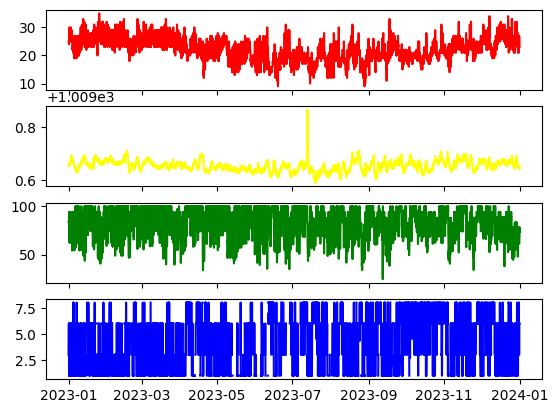

In [26]:
# Analisando os dados através de figuras
import matplotlib.pyplot as plt

fig,ax = plt.subplots((4), sharex = True)
ax[0].plot(metSuperficie['datetime'],metSuperficie['temp'], color = 'red')
ax[1].plot(metSuperficie['datetime'],metSuperficie['p'], color = 'yellow')
ax[2].plot(metSuperficie['datetime'],metSuperficie['relh'], color = 'green')
ax[3].plot(metSuperficie['datetime'],metSuperficie['cco'], color = 'blue')